In [1]:
import tangos
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rcParams

import pynbody
import tangos

import sys
sys.path.insert(0, '../util/')
from util_os import util_os

# z=0 Population Figure

Selection criteria is Mstar 10^8,10^9 and Vmax 80-100km/s

In [2]:
# load data for selected galaxies
fpath = '~/H1-merian/csvs/pf_selectedMasses_rom_z0.1.txt'
dfSelected = pd.read_csv(fpath)
mvir_sel = dfSelected['Mvir'].to_numpy()
mgas_sel = dfSelected['Mgas'].to_numpy()
mbar_sel = dfSelected['Mbar'].to_numpy()
mstar_sel = dfSelected['Mstar'].to_numpy()

In [3]:
# load quantities from tangos
sim = tangos.get_simulation('cosmo25')
ts = sim.timesteps[-7]

# for making central cut
centers = ts.calculate_all('shrink_center')[0]
radii = ts.calculate_all('max_radius')[0]
masses = ts.calculate_all('Mvir')[0]

# for plotting 
mstar = ts.calculate_all('Mstar')[0]
mgas = ts.calculate_all('Mgas')[0]
mbar = ts.calculate_all('Mbar')[0]
mvir = ts.calculate_all('Mvir')[0]

In [4]:
mstar

array([6.18565177e+11, 5.53639452e+11, 6.66062870e+11, ...,
       2.28176136e+06, 7.47328146e+05, 4.01372729e+06])

In [86]:
centrals = []
for i in range(len(masses)):
    # take distance of galaxy i from all other galaxies
    distances = np.linalg.norm(centers - centers[i], axis=1)
    
    # remove distance from self
    distances = np.delete(distances, i)
    rads = np.delete(radii, i)*5
    
    selfMass = masses[i]
    otherMass = np.delete(masses, i)
    
    # central galaxies are not within another, larger, galaxy's radius
    massMask = selfMass < otherMass
    distMask = distances < rads

    # first mask by mass 
    distMask = distMask[massMask]
    # if a central
    if True not in distMask:
        centrals.append(True)
    # if not 
    else:
        centrals.append(False)

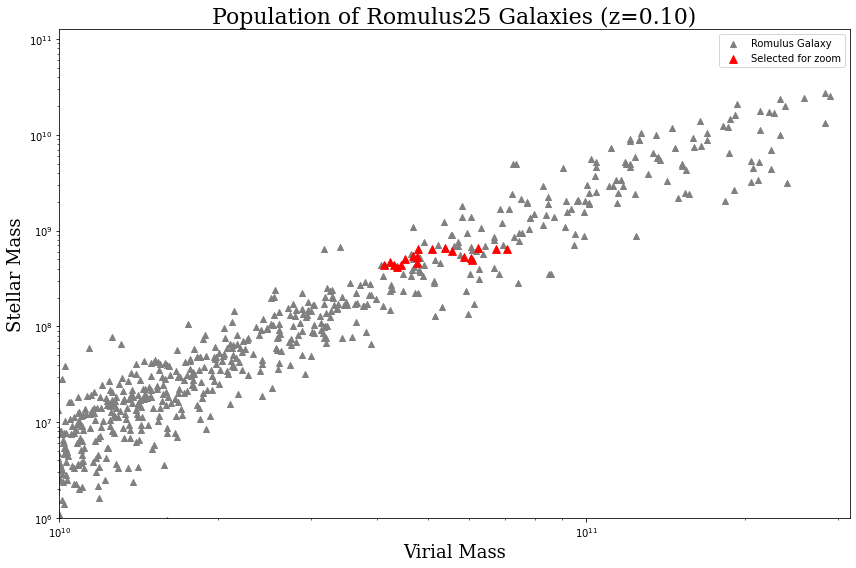

In [113]:
# virial and stellar mass 
fig = plt.figure(figsize=(12,8))

plt.scatter(mvir[centrals],mstar[centrals], marker='^', c='gray')
plt.scatter(mvir_sel, mstar_sel, marker='^', c='red', s=60)
plt.xscale('log')
plt.yscale('log')

plt.xlim([10**10.0, 10**11.5])
plt.ylim([10**6, 10**11.1])

plt.title('Population of Romulus25 Galaxies (z=0.10)', fontsize=22, fontfamily='serif')
plt.xlabel('Virial Mass', fontsize=18, fontfamily='serif')
plt.ylabel('Stellar Mass', fontsize=18, fontfamily='serif')

plt.legend(['Romulus Galaxy', 'Selected for zoom'])

plt.tight_layout()

plt.savefig('../figures/popFig/popFig_virialStellar_z08.png')

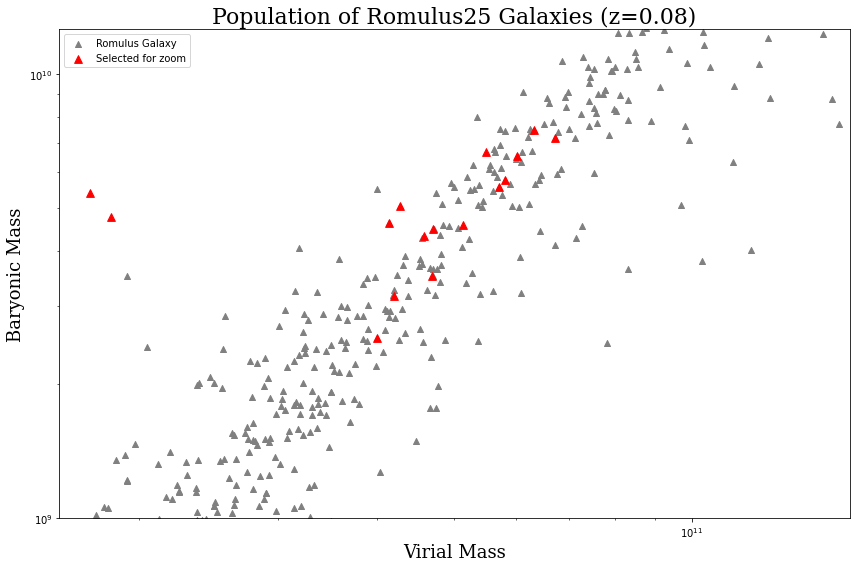

In [15]:
# virial and baryonic mass 
fig = plt.figure(figsize=(12,8))

plt.scatter(mvir,mbar, marker='^', c='gray')
plt.scatter(mvir_sel, mbar_sel, marker='^', c='red', s=60)
plt.xscale('log')
plt.yscale('log')

plt.xlim([10**10.2, 10**11.2])
plt.ylim([10**9, 10**10.1])

plt.title('Population of Romulus25 Galaxies (z=0.08)', fontsize=22, fontfamily='serif')
plt.xlabel('Virial Mass', fontsize=18, fontfamily='serif')
plt.ylabel('Baryonic Mass', fontsize=18, fontfamily='serif')

plt.legend(['Romulus Galaxy', 'Selected for zoom'])

plt.tight_layout()

#plt.savefig('../figures/popFig/popFig_virialBar_z08.png')

## Two Panel with Rotation Curves for zooms

In [16]:
haloIDs = util_os.getGalaxies()[0]
#haloIDs = [431, 468, 492, 502, 523, 556, 568, 569, 597, 615]

pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane
pynbody.analysis.profile : Profile v_circ -- this 

OSError: File '/data/REPOSITORY/e11Gals/romulus_dwarf_zooms/r597.romulus25.3072g1HsbBH/r597.romulus25.3072g1HsbBH.004096': format not understood or does not exist

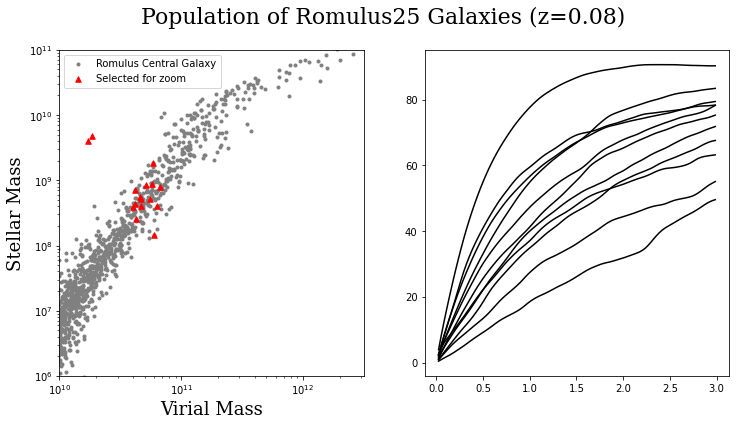

In [17]:
fig, axs = plt.subplots(1,2, figsize=(12,6), facecolor='w')

# plot left; scatter 
axs[0].scatter(mvir,mstar, marker='.', c='gray')
axs[0].scatter(mvir_sel, mstar_sel, marker='^', c='red', s=30)
axs[0].set_xscale('log')
axs[0].set_yscale('log')

axs[0].set_xlim([10**10.0, 10**12.5])
axs[0].set_ylim([10**6, 10**11])

plt.suptitle('Population of Romulus25 Galaxies (z=0.08)', fontsize=22, fontfamily='serif')
axs[0].set_xlabel('Virial Mass', fontsize=18, fontfamily='serif')
axs[0].set_ylabel('Stellar Mass', fontsize=18, fontfamily='serif')

axs[0].legend(['Romulus Central Galaxy', 'Selected for zoom'])

# plot right; rotation

# iterate through and do rotation plot 
pmin = '0.01 kpc'
pmax = '3 kpc'
for hID in haloIDs:
    cdmFile = util_os.getfilepath_cdm(hID)
    #if str(hID=='597':
     #   cdmFile = cdmpathh+'/r597.romulus25.3072g1HsbBH.004096'
        
        
    sCDM = pynbody.load(cdmFile)
    sCDM.physical_units()
    hCDM = sCDM.halos()[1]

    # center based on potential
    cen_pot_cdm = pynbody.analysis.halo.center(hCDM, mode='pot', retcen=True)
    sCDM['pos'] -= cen_pot_cdm

    pynbody.analysis.angmom.faceon(hCDM)

    pCDM  = pynbody.analysis.profile.Profile(hCDM,   rmin=pmin, rmax=pmax, type='lin')
    axs[1].plot(pCDM['rbins'],pCDM['v_circ'], c='k')

axs[1].set_xlabel('radius [kpc]', fontsize=18)
axs[1].set_ylabel(r'$v_{circ}$[km/s]', fontsize=18)
    
plt.tight_layout()
plt.savefig('../figures/popFig/popFig_2panel_z08.png')

# Mass Comparison Between Zooms and Romulus

In [96]:
# first get all the relevant zoom masses
# I put these in a csv bc plotting w the ones that aren't done zoom simming would be annoying otherwise
gals = util_os.getGalaxies()[0]

for gal in gals:
    file = util_os.getfilepath_cdm(gal, 0)
    
    sCDM = pynbody.load(file)
    sCDM.physical_units()
    hCDM = sCDM.halos()[1]
    
    Mstar = hCDM.s['mass'].sum()
    Mgas = hCDM.g['mass'].sum()
    
    print(gal, int(Mstar), int(Mgas))

431 1481473268 8160738204
442 1497341940 7763964994
468 2051032297 5048519027
492 1187078254 7763107115
502 1420308754 5660535326
515 1101367699 9211607839
523 533643351 4390078210
556 1087243339 3654884798
568 1931097616 5325541179
569 476262455 4621570763
571 440148469 4958664671
597 547829303 3587468513
613 548619521 4588626636
615 2973780322 16827322340
618 439643103 3148433108
634 444532770 4476546983


In [9]:
np.log10(df['Mstar'])

0     9.170694
1     9.175321
2     9.311972
3          NaN
4     9.074479
5     9.152383
6     9.041932
7     8.727251
8          NaN
9     9.036327
10    9.285804
11    8.677846
12    8.643599
13    8.738645
14    8.739271
15         NaN
16    9.473309
17    8.643100
18    8.647904
Name: Mstar, dtype: float64

In [16]:
# now load that csv 
df = pd.read_csv('/home/jw1624/H1-merian/csvs/pf_zoomMasses_rom_z0.1.txt')

galID = df['galaxy']
Mstar_zoom = df['Mstar']
Mgas_zoom = df['Mgas']

In [20]:
matplotlib.rc('font', family='serif')
rcParams['axes.linewidth'] = 3
rcParams['xtick.major.width'] = 3
rcParams['xtick.major.size'] = 12
rcParams['ytick.major.width'] = 3
rcParams['ytick.major.size'] = 12

rcParams['xtick.minor.width'] = 3
rcParams['xtick.minor.size'] = 12
rcParams['ytick.minor.width'] = 3
rcParams['ytick.minor.size'] = 12

rcParams['font.family'] = 'serif'

rcParams['text.usetex'] = False

rcParams['savefig.bbox'] = 'tight'
rcParams['savefig.transparent'] = False

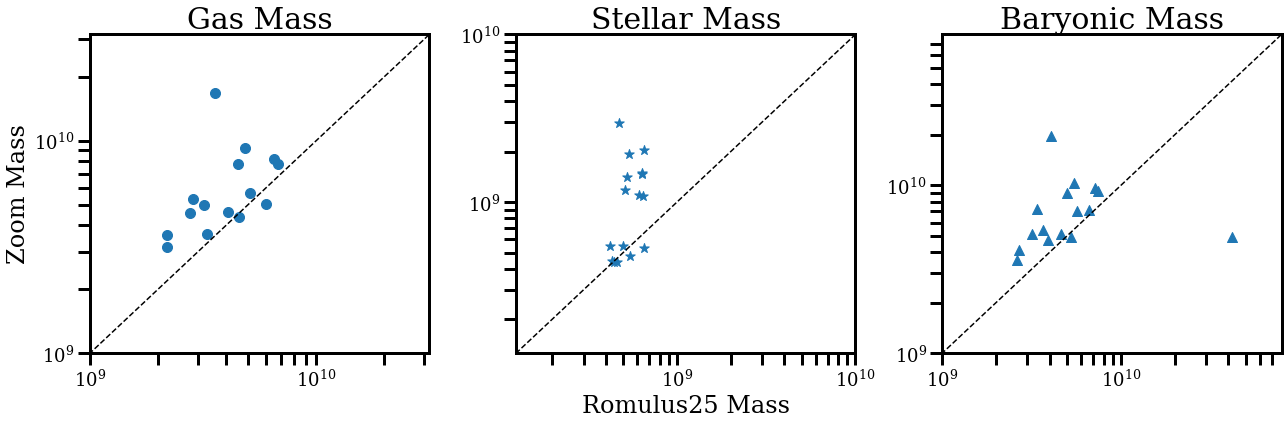

In [30]:
fig, axs = plt.subplots(1,3, figsize=(18,6), facecolor='w')

a = 10**8
b = 10**11
s=100

# left 
axs[0].scatter(mgas_sel, Mgas_zoom, marker='o', s=s)
axs[0].plot([a,b], [a,b], c='k', linestyle='--')

axs[0].set_xlim([10**9,10**10.5])
axs[0].set_ylim([10**9,10**10.5])

axs[0].set_xscale('log')
axs[0].set_yscale('log')

# center 
axs[1].scatter(mstar_sel, Mstar_zoom, marker='*', s=s)
axs[1].plot([a,b], [a,b], c='k', linestyle='--')

axs[1].set_xlim([10**8.1,10**10])
axs[1].set_ylim([10**8.1,10**10])

axs[1].set_xscale('log')
axs[1].set_yscale('log')

# center 
axs[2].scatter(mstar_sel+mgas_sel, Mstar_zoom+Mgas_zoom, marker='^', s=s)
axs[2].plot([a,b], [a,b], c='k', linestyle='--')

axs[2].set_xlim([10**9,10**10.9])
axs[2].set_ylim([10**9,10**10.9])

axs[2].set_xscale('log')
axs[2].set_yscale('log')

# prettify 
axs[0].set_ylabel('Zoom Mass', fontfamily='serif', fontsize=24)
axs[1].set_xlabel('Romulus25 Mass', fontfamily='serif', fontsize=24)

axs[0].set_title('Gas Mass', fontfamily='serif', fontsize=30)
axs[1].set_title('Stellar Mass', fontfamily='serif', fontsize=30)
axs[2].set_title('Baryonic Mass', fontfamily='serif', fontsize=30)

axs[0].tick_params(axis='both', which='major', labelsize=18)
axs[1].tick_params(axis='both', which='major', labelsize=18)
axs[2].tick_params(axis='both', which='major', labelsize=18)

axs[0].tick_params(axis='both', which='minor', labelsize=0)
axs[1].tick_params(axis='both', which='minor', labelsize=0)
axs[2].tick_params(axis='both', which='minor', labelsize=0)

plt.tight_layout()

plt.savefig('/home/jw1624/H1-merian/figures/popFig/massComp.png')

In [155]:
galID[Mstar_zoom>10**9]

0     431
1     442
2     468
4     492
5     502
6     515
9     556
10    568
16    615
Name: galaxy, dtype: int64

In [157]:
np.log10(df['Mstar'])

/home/jw1624/miniconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


0     9.170694
1     9.175321
2     9.311972
3          NaN
4     9.074479
5     9.152383
6     9.041932
7     8.727251
8          NaN
9     9.036327
10    9.285804
11    8.677846
12    8.643599
13    8.738645
14    8.739271
15         NaN
16    9.473309
17    8.643100
18    8.647904
Name: Mstar, dtype: float64